In [1]:
# onedrive = r"C:\Users\Mike.Kryajak\OneDrive"
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import scipy
import re
import netCDF4 as nc
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\gridtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


# from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *
from code_comparison.solps_pp import *


import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.plot_solps       import plot_1d, plot_2d, plot_wall_loads
from gridtools.solps_python_scripts.read_ft44 import read_ft44
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
import netCDF4 as nc
slpath = r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_MK\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.NESEPM=2.0E+19"

spc = self =  SOLPScase(slpath)

In [3]:
%matplotlib widget

Data shape: (112, 38)
Grid shape: (112, 38)


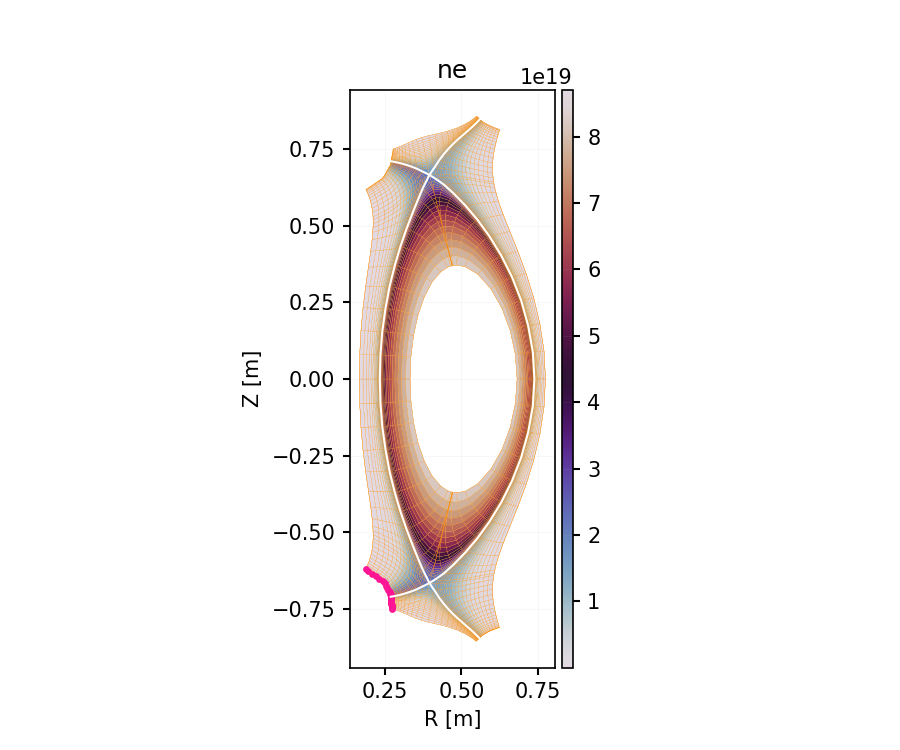

In [68]:
plt.close("all")
spc = self =  SOLPScase(slpath)

sel = (1, slice(None,None))
self.plot_selection(sel)


In [96]:
bal["hy"].shape

(112, 38)

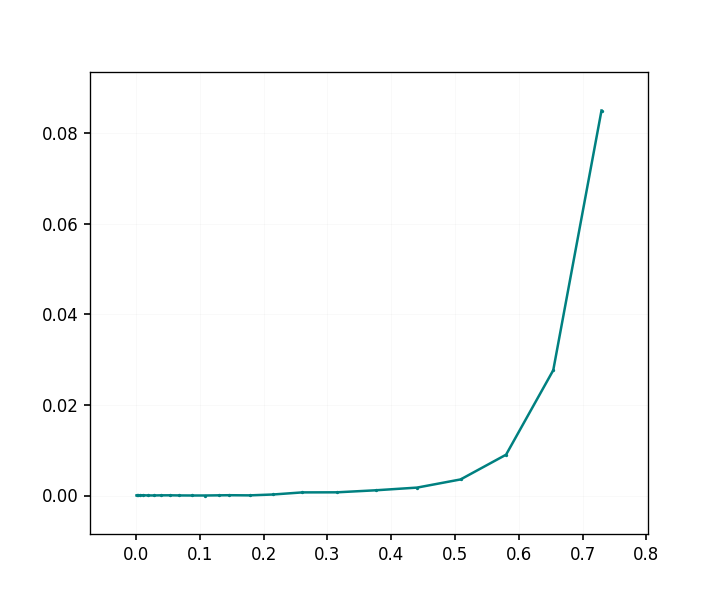

In [70]:



## EIRENE derived variables have extra values in the arrays
## Either 5 or 2 extra zeros at the end in poloidal depending on topology
# double_null = True
# if double_null is True:
#     ignore_idx = 5
# else:
#     ignore_idx = 2
    
# spc = self =  SOLPScase(slpath)
# bal = self.bal
# data = {}
# data["Td+"] = bal["ti"] / constants("q_e")
# data["Te"] = bal["te"] / constants("q_e")
# data["Ne"] = bal["ne"]
# data["Pe"] = bal["ne"] * bal["te"] * constants("q_e")
# data["Pd+"] = bal["ne"] * bal["ti"] * constants("q_e")

# data["Na"] = bal["dab2"][:-ignore_idx, :]  
# data["Nm"] = bal["dmb2"][:-ignore_idx, :] 
# data["Nn"] = data["Na"] + data["Nm"] * 2
# data["Ta"] = bal["tab2"][:-ignore_idx, :] / constants("q_e")
# data["Tm"] = bal["tmb2"][:-ignore_idx, :] / constants("q_e")
# data["Pa"] = data["Na"] * data["Ta"] * constants("q_e")
# data["Pm"] = data["Nm"] * data["Tm"] * constants("q_e")

# data["Pn"] = data["Pa"] + data["Pm"]
# data["Tn"] = data["Pn"] / data["Nn"] / constants("q_e")

spc = self =  SOLPScase(slpath)
self.derive_data()



regions = {}

# index = np.cumsum(self.g["hx"][selector])
list_params = ["Td+", "Te", "Ne", "Pe", "Pd+", "Na", "Nn", "Nm", "Ta", "Tn", "Tm", "Pa", "Pm", "Pn"]

### ALL WITH NO GUARDS

# OMP
selector = self.s["omp"]
df = pd.DataFrame(index = self.g["radial_dist"][1:-1])
for param in list_params:
    df[param] = data[param][selector][1:-1] 
regions["omp"] = df.copy()

# IMP
selector = self.s["imp"]
df = pd.DataFrame(index = self.g["radial_dist"][1:-1])
for param in list_params:
    df[param] = data[param][selector][1:-1] 
regions["imp"] = df.copy()

# Outer lower target
selector = self.s["outer_lower_target"]
df = pd.DataFrame(index = self.g["radial_dist"][1:-1])
for param in list_params:
    df[param] = data[param][selector][1:-1] 
regions["outer_lower_target"] = df.copy()

# Inner lower target
selector = self.s["inner_lower_target"]
df = pd.DataFrame(index = self.g["radial_dist"][1:-1])
for param in list_params:
    df[param] = data[param][selector][1:-1] 
regions["inner_lower_target"] = df.copy()

# outer_fieldline
selector = self.make_custom_sol_ring("outer_lower", i = 0)
index = np.cumsum(self.g["hx"][selector])[:-1]
df = pd.DataFrame(index = index)
for param in list_params:
    df[param] = data[param][selector][:-1]
regions["outer_fieldline"] = df.copy()

# inner_fieldline
selector = self.make_custom_sol_ring("inner_lower", i = 0)
index = np.cumsum(self.g["hx"][selector])[:-1]
df = pd.DataFrame(index = index)
for param in list_params:
    df[param] = data[param][selector][::-1][:-1]
regions["inner_fieldline"] = df.copy()


    

In [52]:
df

,Td+,Te,Ne,Pe,Pd+,Na,Nn,Nm,Ta,Tn,Tm,Pa,Pm,Pn
-0.056536,1752.545178,1459.942288,8.284195e+19,3.104608e-15,3.726836e-15,1.366387e+14,1.366387e+14,0.000000e+00,931.607262,931.607262,0.000001,0.020395,0.000000e+00,0.020395
-0.046836,1605.222862,1352.778771,8.176124e+19,2.839194e-15,3.369020e-15,1.366387e+14,1.366387e+14,0.000000e+00,931.607262,931.607262,0.000001,0.020395,0.000000e+00,0.020395
-0.038637,1338.979035,1148.836346,7.822307e+19,2.306821e-15,2.688620e-15,2.475424e+14,2.475424e+14,0.000000e+00,754.347882,754.347882,0.000001,0.029918,0.000000e+00,0.029918
-0.031627,1111.675237,967.851768,7.491697e+19,1.861272e-15,2.137858e-15,3.746131e+14,3.746131e+14,0.000000e+00,546.081151,546.081151,0.000001,0.032776,0.000000e+00,0.032776
-0.025782,921.158072,811.376462,7.171226e+19,1.493608e-15,1.695697e-15,6.173980e+14,6.173980e+14,0.000000e+00,498.474517,498.474517,0.000001,0.049308,0.000000e+00,0.049308
-0.020835,764.513735,679.458878,6.850078e+19,1.194757e-15,1.344317e-15,6.785123e+14,6.785123e+14,0.000000e+00,503.129409,503.129409,0.000001,0.054695,0.000000e+00,0.054695
-0.016600,631.552359,565.138006,6.503519e+19,9.434605e-16,1.054335e-15,1.202641e+15,1.202641e+15,0.000000e+00,352.512305,352.512305,0.000001,0.067924,0.000000e+00,0.067924
-0.013162,523.067396,470.048303,6.131933e+19,7.398789e-16,8.233336e-16,1.571384e+15,1.571384e+15,0.000000e+00,254.262580,254.262580,0.000001,0.064014,0.000000e+00,0.064014
-0.010328,438.563176,394.567905,5.737888e+19,5.811585e-16,6.459590e-16,2.220545e+15,2.220545e+15,0.000000e+00,206.265213,206.265213,0.000001,0.073383,0.000000e+00,0.073383
-0.007994,370.754588,332.777207,5.307842e+19,4.534113e-16,5.051558e-16,3.233633e+15,3.233633e+15,0.000000e+00,179.920615,179.920615,0.000001,0.093214,0.000000e+00,0.093214


In [107]:
bal["ne"].shape


(112, 38)

In [4]:
print(f"Leftcut: {slc.g['leftcut']}")
print(f"Rightcut: {slc.g['rightcut']}")
print(f"Topcut: {slc.g['topcut']}")

Leftcut: [11 35]
Rightcut: [91 67]
Topcut: [17 17]


In [12]:
%matplotlib inline
plt.close("all")

In [ ]:
s["imp"]

In [45]:
# Get cell centre coordinates
R = self.g["R"] = np.mean(bal["crx"], axis=0).transpose()
Z = self.g["Z"] = np.mean(bal["cry"], axis=0).transpose()

R.shape

(112, 38)

In [11]:
ds = nc.Dataset(os.path.join(slpath, "balance.nc"))

print(ds["ne"].shape)

ds.close()

(38, 112)


In [66]:
%matplotlib widget

(38, 112)
112 38


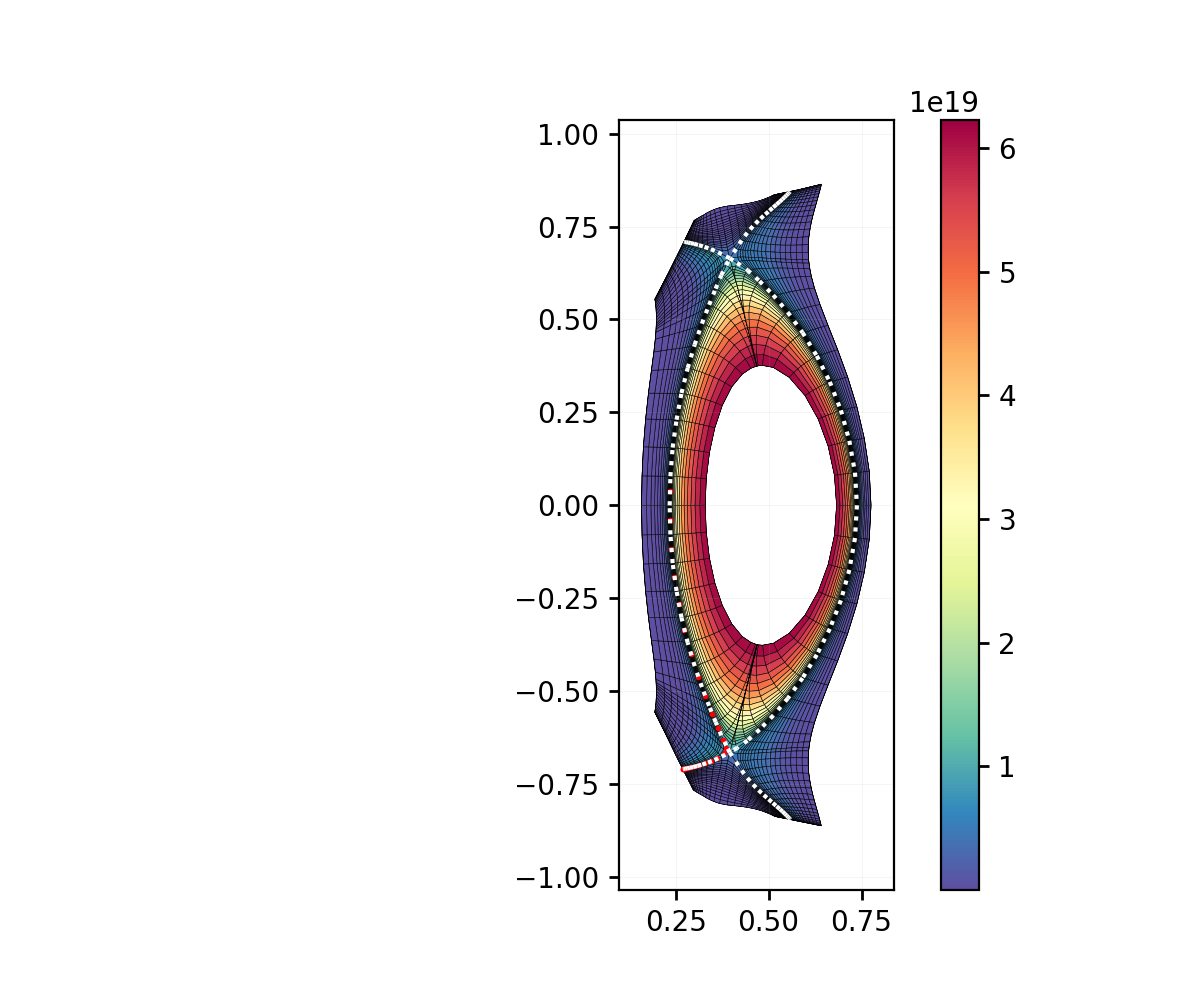

In [70]:
plt.close("all")

fig, ax = plt.subplots(dpi = 200)
self.plot_2d(ax = ax, fig = fig, param = "ne", antialias = True, linewidth = 0.2)

bal = self.bal

g = self.g = {}
        
self.g["cry"] = bal["cry"][:].transpose()
self.g["crx"] = bal["crx"][:].transpose()
self.g["nx"] = self.g["crx"].shape[0]
self.g["ny"] = self.g["crx"].shape[1]
# Get cell centre coordinates
R = self.g["R"] = np.mean(bal["crx"], axis=0).transpose()
Z = self.g["Z"] = np.mean(bal["cry"], axis=0).transpose()

leftix = bal["leftix"][:]+1
leftix_diff = np.diff(leftix[1,:])
g["xcut"] = xcut = np.argwhere(leftix_diff<0).squeeze()
g["leftcut"] = [xcut[0]-2, xcut[1]+2]
g["rightcut"] = [xcut[4]-1, xcut[3]-1]

omp = int((g["rightcut"][0] + g["rightcut"][1])/2) + 1
imp = int((g["leftcut"][0] + g["leftcut"][1])/2)
upper_break = int(imp + (omp - imp)/2) - 2
upper_break = g["xcut"][2]
sep = bal["jsep"][:][0] + 2
        # sep = min(g["topcut"][0], g["topcut"][1]) +1

s = {}
s["imp"] = [imp, slice(None,None)]
s["omp"] = [omp, slice(None,None)]
s["outer"] = [slice(upper_break,None), sep]
s["outer_lower"] = [slice(omp,None), sep]
s["outer_upper"] = [slice(upper_break, omp), sep]
s["inner"] = [slice(None, upper_break-1), sep]
s["inner_lower"] = [slice(None, imp+1), sep]
s["inner_upper"] = [slice(imp, upper_break-1), sep]
sel = s["inner_lower"]
ax.scatter(R[sel[0], sel[1]], Z[sel[0], sel[1]], s = 1, c = "r")
self.plot_separatrix(ax, ls = ":")

# ax.set_ylim(-0.9, 0.1)

In [6]:
leftix_diff[leftix_diff < 0]

masked_array(data=[-79, -31, -49, -31, -79],
             mask=False,
       fill_value=999999)